In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [368]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/Users/dunnzy22/DSE 3010/LungCancer.csv')

In [369]:
#Label Encoding for categorical variables
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['SMOKING'] = label_encoder.fit_transform(data['SMOKING'])
data['YELLOW_FINGERS'] = label_encoder.fit_transform(data['YELLOW_FINGERS'])
data['ANXIETY'] = label_encoder.fit_transform(data['ANXIETY'])
data['PEER_PRESSURE'] = label_encoder.fit_transform(data['PEER_PRESSURE'])
data['CHRONIC_DISEASE'] = label_encoder.fit_transform(data['CHRONIC_DISEASE'])
data['FATIGUE'] = label_encoder.fit_transform(data['FATIGUE'])
data['ALLERGY'] = label_encoder.fit_transform(data['ALLERGY'])
data['WHEEZING'] = label_encoder.fit_transform(data['WHEEZING'])
data['ALCOHOL_CONSUMING'] = label_encoder.fit_transform(data['ALCOHOL_CONSUMING'])
data['COUGHING'] = label_encoder.fit_transform(data['COUGHING'])
data['SHORTNESS_OF_BREATH'] = label_encoder.fit_transform(data['SHORTNESS_OF_BREATH'])
data['SWALLOWING_DIFFICULTY'] = label_encoder.fit_transform(data['SWALLOWING_DIFFICULTY'])
data['CHEST_PAIN'] = label_encoder.fit_transform(data['CHEST_PAIN'])

#Encode the target variable 'LUNG_CANCER' (0: No, 1: Yes)
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])


In [370]:
# Calculate the correlation matrix for the features
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.010966  0.028505       -0.014412  0.023891   
AGE                    0.010966  1.000000  0.020289       -0.016101 -0.030051   
SMOKING                0.028505  0.020289  1.000000       -0.001497 -0.055562   
YELLOW_FINGERS        -0.014412 -0.016101 -0.001497        1.000000  0.012342   
ANXIETY                0.023891 -0.030051 -0.055562        0.012342  1.000000   
PEER_PRESSURE         -0.010019 -0.003850 -0.032041        0.011394 -0.024692   
CHRONIC_DISEASE       -0.008488  0.025655  0.045697       -0.013216  0.016903   
FATIGUE               -0.002193  0.002322  0.019635       -0.010761 -0.006250   
ALLERGY               -0.013211 -0.024915  0.004908       -0.005709 -0.001174   
WHEEZING               0.009284  0.018212  0.000571        0.004151 -0.016065   
ALCOHOL_CONSUMING      0.009173  0.020704  0.003022        0.027167 -0.001542   
COUGHING               0.005

In [371]:
#Creating 3 columnns for age: 

# Define the bins (ranges) for age
bins = [30, 50, 70, float('inf')]  # You can adjust the edges based on your dataset

# Define labels for each bin (age group)
labels = ['Young Adult', 'Adult', 'Senior']

# Create a new column 'Age_Group' based on the bins
data['Age_Group'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)  # right=False means the bin will not include the right edge

# Encode the 'Age_Group' column into numerical values
#age_group_encoder = LabelEncoder()
#data['Age_Group'] = age_group_encoder.fit_transform(data['Age_Group']) #Young Adult = 0, Adult = 1, and Senior = 2

#print(data.head)

In [372]:
# Display count of LUNG_CANCER (YES/NO) for each Age_Group
lung_cancer_distribution = data.groupby('Age_Group')['LUNG_CANCER'].value_counts().unstack(fill_value=0)

# Show the distribution
print(lung_cancer_distribution)

# Calculate the percentage of YES for LUNG_CANCER in each age group
lung_cancer_percentage = lung_cancer_distribution.div(lung_cancer_distribution.sum(axis=1), axis=0) * 100

# Show the percentage distribution
print(lung_cancer_percentage)

LUNG_CANCER    0    1
Age_Group            
Young Adult  541  617
Adult        621  574
Senior       320  327
LUNG_CANCER          0          1
Age_Group                        
Young Adult  46.718480  53.281520
Adult        51.966527  48.033473
Senior       49.459042  50.540958


/var/folders/bf/zn97d2b14x7cfnf56hy5g9z00000gn/T/ipykernel_66172/3099454351.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lung_cancer_distribution = data.groupby('Age_Group')['LUNG_CANCER'].value_counts().unstack(fill_value=0)


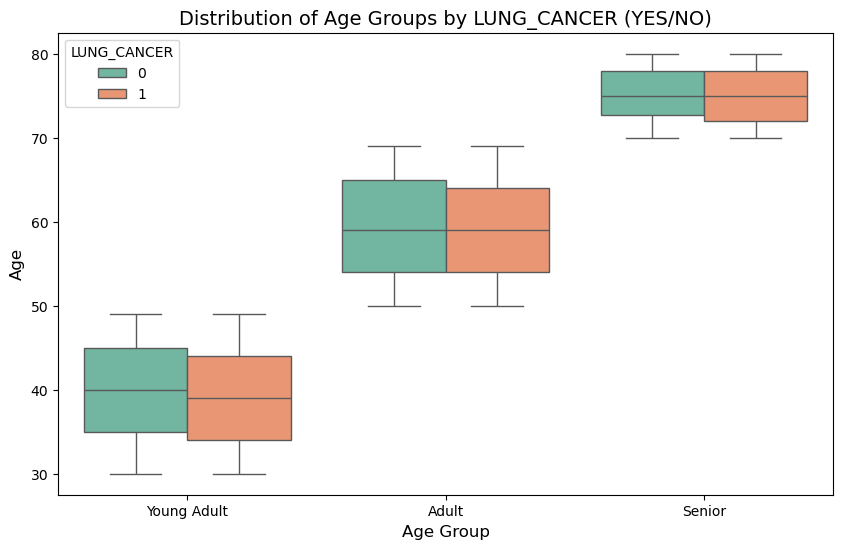

In [373]:
# Ensure that 'LUNG_CANCER' is treated as a categorical variable if it's not already
data['LUNG_CANCER'] = data['LUNG_CANCER'].astype('category')

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='AGE', hue='LUNG_CANCER', data=data, palette='Set2')

# Add title and labels
plt.title('Distribution of Age Groups by LUNG_CANCER (YES/NO)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.show()

In [374]:
# Encode the 'Age_Group' column into numerical values
age_group_encoder = LabelEncoder()
data['Age_Group'] = age_group_encoder.fit_transform(data['Age_Group']) #Young Adult = 0, Adult = 1, and Senior = 2

In [375]:
# Create a new feature 'Smoking_Chronic_Interaction'
data['Smoking_Chronic_Illness_Interaction'] = data['SMOKING'] & data['CHRONIC_DISEASE']
# 1 if both chronic disease and smoking is present
# 0 if neither chronic disease nor smoking are present



# Assuming 'Swallowing' and 'Anxiety' are existing features in the DataFrame
data['Swallowing_Anxiety_Interaction'] = data['SWALLOWING_DIFFICULTY'] * data['ANXIETY']
# 1 if both swallowing difficulty and anxiety are present
# 0 if neither swallowing difficulty and anxiety are present


# Drop the original columns (Age, Smoking, and Chronic Disease)
data = data.drop(columns=['AGE', 'SMOKING', 'CHRONIC_DISEASE', 'SWALLOWING_DIFFICULTY', 'ANXIETY'])

# Verify the columns are removed
print(data.head())


   GENDER  YELLOW_FINGERS  PEER_PRESSURE  FATIGUE  ALLERGY  WHEEZING  \
0       1               1              0        1        0         0   
1       0               0              1        0        0         0   
2       0               0              1        0        1         0   
3       1               1              1        1        0         1   
4       0               1              1        0        1         0   

   ALCOHOL_CONSUMING  COUGHING  SHORTNESS_OF_BREATH  CHEST_PAIN LUNG_CANCER  \
0                  0         0                    0           1           0   
1                  1         1                    1           0           0   
2                  1         1                    0           1           1   
3                  1         0                    1           0           1   
4                  1         1                    1           0           0   

   Age_Group  Smoking_Chronic_Illness_Interaction  \
0          0                           

In [376]:
# Define the feature set and target variable
features = [
    'GENDER', 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE', 'ALLERGY', 
    'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
    'CHEST_PAIN', 'Age_Group', 'Smoking_Chronic_Illness_Interaction'
]

target = 'LUNG_CANCER'

# Assuming 'data' is your DataFrame and 'target_column' is the name of your target column
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']


In [377]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [378]:
#Random Forest

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 50.17%
Confusion Matrix:
[[152 150]
 [149 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       302
           1       0.50      0.50      0.50       298

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



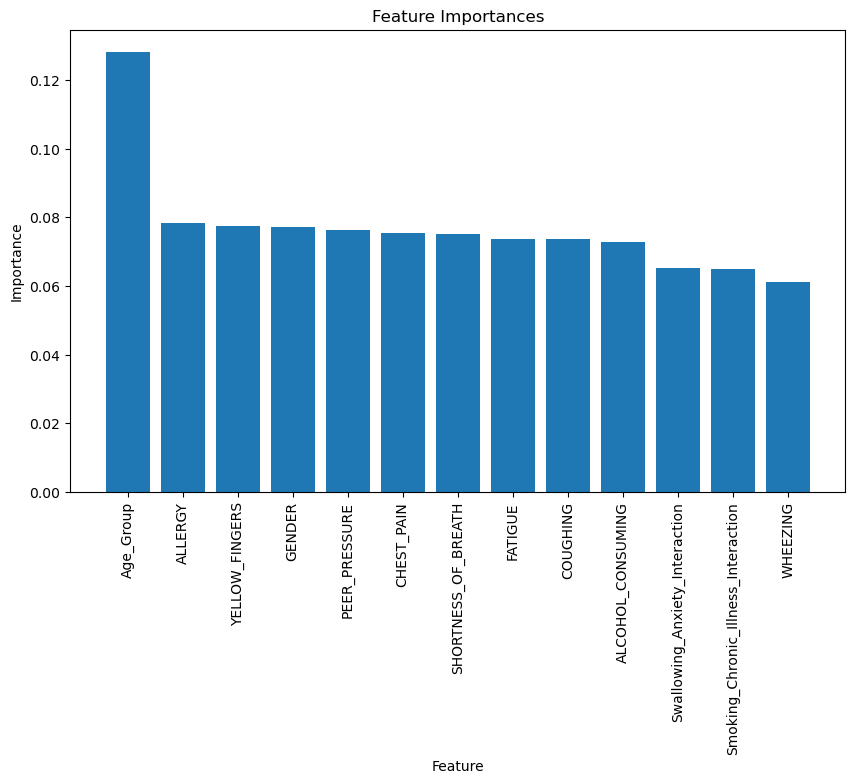

In [379]:
# Plot the feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [380]:
#Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 52.17%


In [381]:
#Logistic Regression

# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(max_iter=200, random_state=42)
LR_model.fit(X_train, y_train)

# Make predictions on the test data
LR_pred = LR_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, LR_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 52.83%


In [382]:
#Normalize the training data for KNN and SVM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [383]:
#SVM Model

modelSVC = SVC(C=.2, class_weight = 'balanced', kernel = 'rbf')
modelSVC.fit(X_train_scaled, y_train)
SVM_pred = modelSVC.predict(X_test_scaled)

accuracy = accuracy_score(y_test, SVM_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 51.00%
